**SMOTE Sampling and LIME Interpretability for E-commerce Fraud Detection**</br>
**EDA**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')



In [2]:
%%time
train_id = pd.read_csv('train_identity.csv')
train_tran = pd.read_csv('train_transaction.csv')


CPU times: user 21.4 s, sys: 15.4 s, total: 36.8 s
Wall time: 55.6 s


In [3]:
print(train_id.shape)
print(train_tran.shape)

(144233, 41)
(590540, 394)


In [4]:
train_id

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [5]:
train_tran

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Count the number of occurrences of 1 in the 'isFraud' column
num_frauds = sum(train_tran['isFraud'] == 1)

# Display the count of 1 values
print("Number of fraud cases: ", num_frauds)

Number of fraud cases:  20663


## EDA

Percentage of fraudulent transactions: 3.50%
Normalized value counts:
               0        1
isFraud  0.96501  0.03499


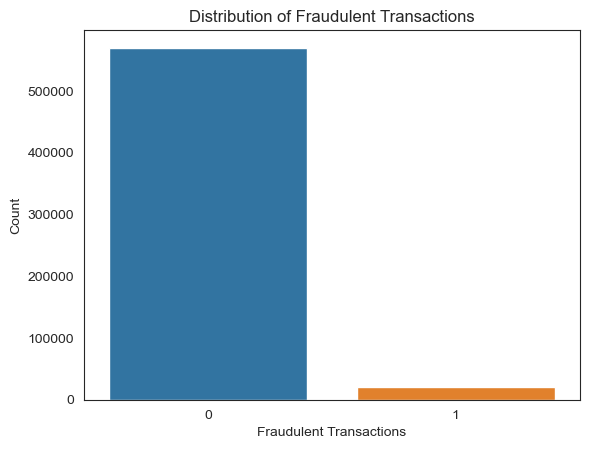

In [7]:
# EDA of the 'isFraud' column
# Countplot of 'isFraud' column
sns.countplot(x='isFraud', data=train_tran)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')

# Calculate the percentage of fraudulent transactions
fraud_pct = train_tran['isFraud'].sum() / len(train_tran) * 100
print('Percentage of fraudulent transactions: {:.2f}%'.format(fraud_pct))

# Display the normalized value counts of the 'isFraud' column
fraud_counts = train_tran['isFraud'].value_counts(normalize=True).to_frame().T
print('Normalized value counts:')
print(fraud_counts)

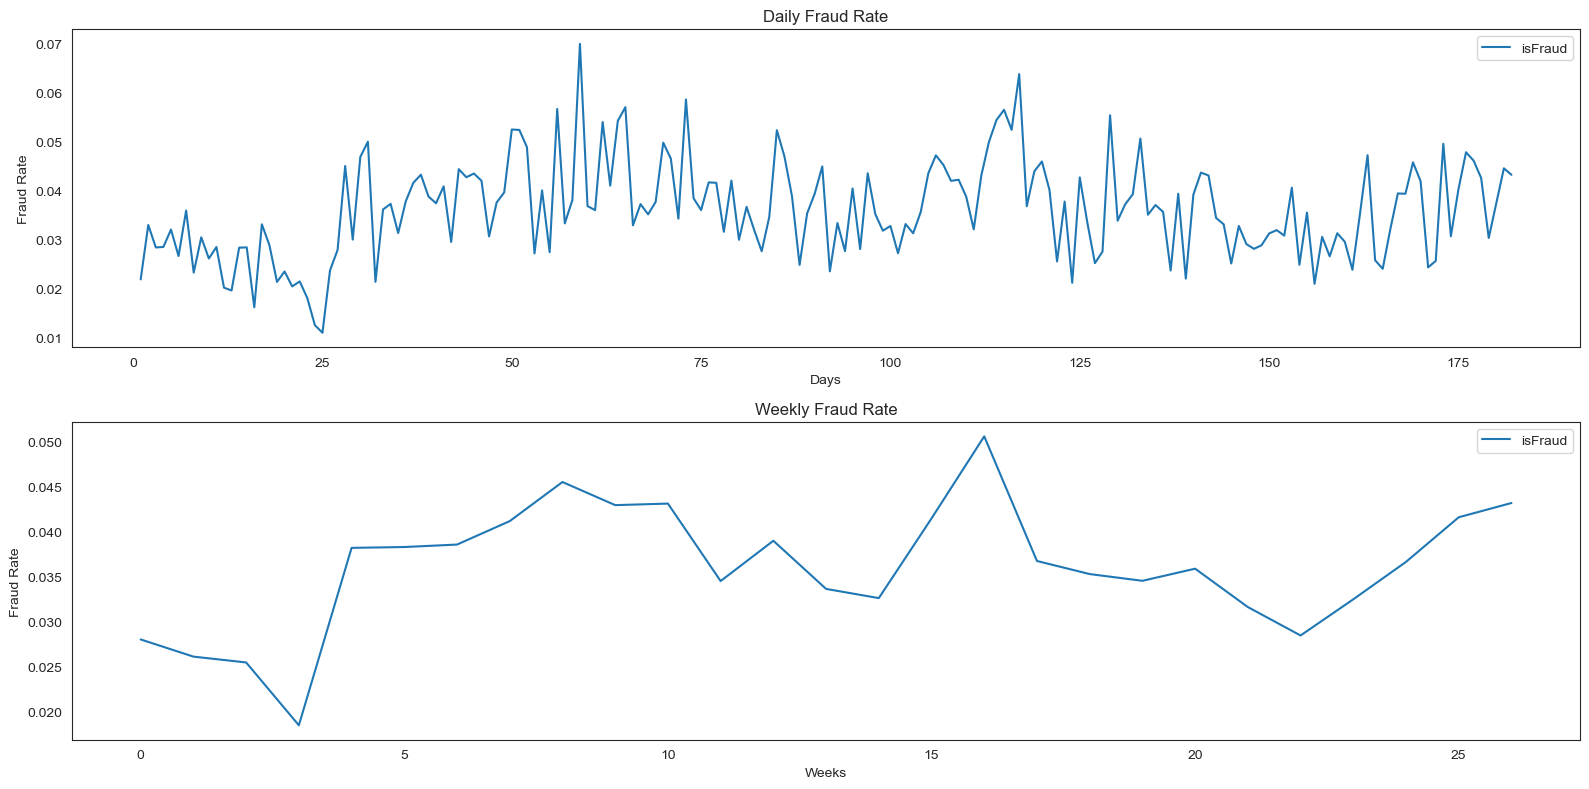

In [8]:
# Create two subplots for daily and weekly fraud rates
fig, ax = plt.subplots(2, 1, figsize=(16, 8))

# Calculate daily and weekly fraud rates
train_tran['_daily_rates'] = train_tran['TransactionDT'] // (24 * 60 * 60)
train_tran['_weekly_rates'] = train_tran['_daily_rates'] // 7
daily_fraud_rate = train_tran.groupby('_daily_rates')['isFraud'].mean()
weekly_fraud_rate = train_tran.groupby('_weekly_rates')['isFraud'].mean()

# Plot the daily and weekly fraud rates
daily_fraud_rate.plot.line(ax=ax[0])
weekly_fraud_rate.plot.line(ax=ax[1])

# Add labels, titles, and legends to the plots
ax[0].set_title('Daily Fraud Rate')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Fraud Rate')
ax[0].legend()

ax[1].set_title('Weekly Fraud Rate')
ax[1].set_xlabel('Weeks')
ax[1].set_ylabel('Fraud Rate')
ax[1].legend()

plt.tight_layout()
plt.show()

In [9]:

START_DATE = '2021-11-30'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")

train_tran['Date'] = train_tran['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
train_tran['_ymd'] = train_tran['Date'].dt.year.astype(str) + '-' + train_tran['Date'].dt.month.astype(str) + '-' + train_tran['Date'].dt.day.astype(str)
train_tran['_year_month'] = train_tran['Date'].dt.year.astype(str) + '-' + train_tran['Date'].dt.month.astype(str)
train_tran['_weekday'] = train_tran['Date'].dt.dayofweek
train_tran['_hour'] = train_tran['Date'].dt.hour
train_tran['_day'] = train_tran['Date'].dt.day


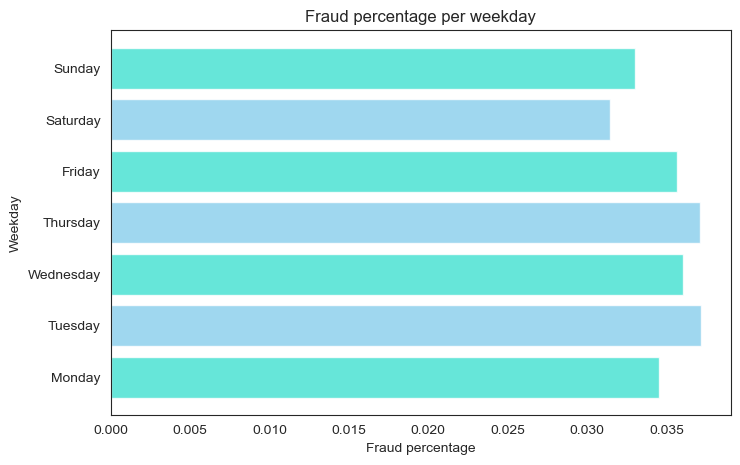

In [10]:
# Fraud percentage per weekday
colors = ['turquoise', 'skyblue']

plt.figure(figsize=(8, 5))
plt.barh(y=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
         width=train_tran.groupby('_weekday')['isFraud'].mean(),
         color=colors, alpha=0.8)
plt.xlabel('Fraud percentage')
plt.ylabel('Weekday')
plt.title('Fraud percentage per weekday')
plt.show()

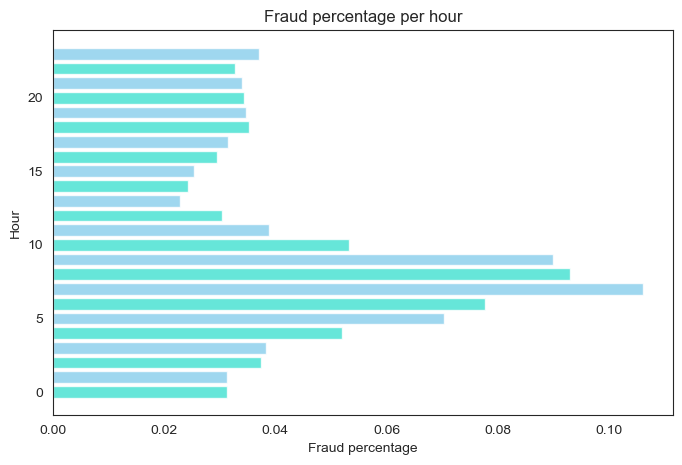

In [11]:
# Fraud percentage per hour
colors = ['turquoise', 'skyblue']

plt.figure(figsize=(8, 5))
plt.barh(y=range(24),
         width=train_tran.groupby('_hour')['isFraud'].mean(),
         color=colors, alpha=0.8)
plt.xlabel('Fraud percentage')
plt.ylabel('Hour')
plt.title('Fraud percentage per hour')
plt.show()

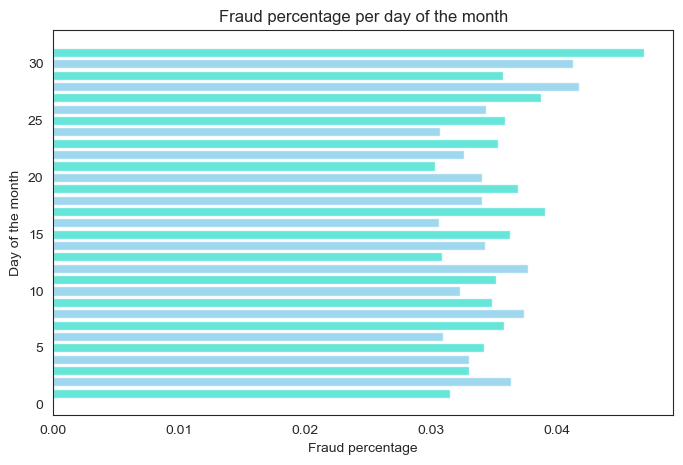

In [12]:
# Fraud percentage per day of the month
colors = ['turquoise', 'skyblue']

plt.figure(figsize=(8, 5))
plt.barh(y=range(1, 32),
         width=train_tran.groupby('_day')['isFraud'].mean(),
         color=colors, alpha=0.8)
plt.xlabel('Fraud percentage')
plt.ylabel('Day of the month')
plt.title('Fraud percentage per day of the month')
plt.show()

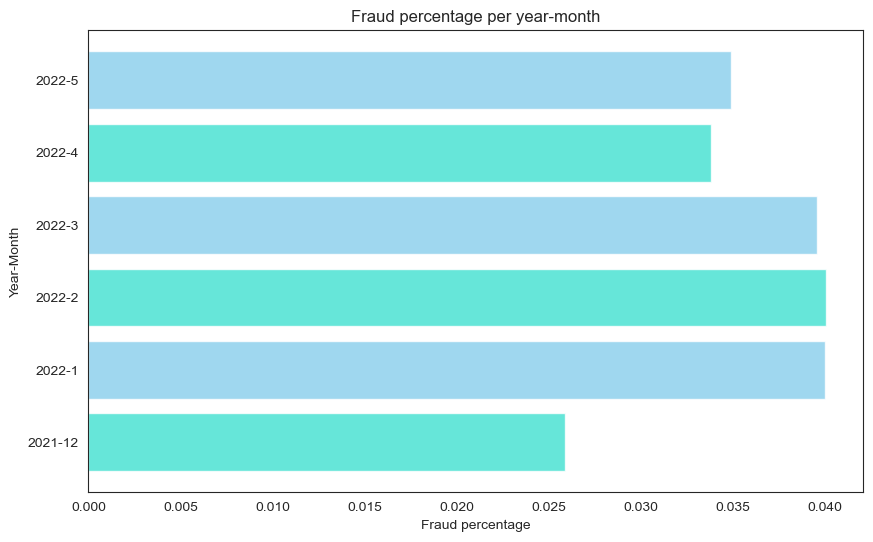

In [13]:
# Fraud percentage per year-month
colors = ['turquoise', 'skyblue']

plt.figure(figsize=(10, 6))
plt.barh(y=train_tran['_year_month'].unique(),
         width=train_tran.groupby('_year_month')['isFraud'].mean(),
         color=colors, alpha=0.8)
plt.xlabel('Fraud percentage')
plt.ylabel('Year-Month')
plt.title('Fraud percentage per year-month')
plt.show()